In [19]:
#Importar las librerías por utlizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import io
from skimage.filters import gaussian, median, sobel, sobel_v, sobel_h
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from skimage.filters import threshold_otsu

#Obtener la direccion de las imagenes
path = os.getcwd()

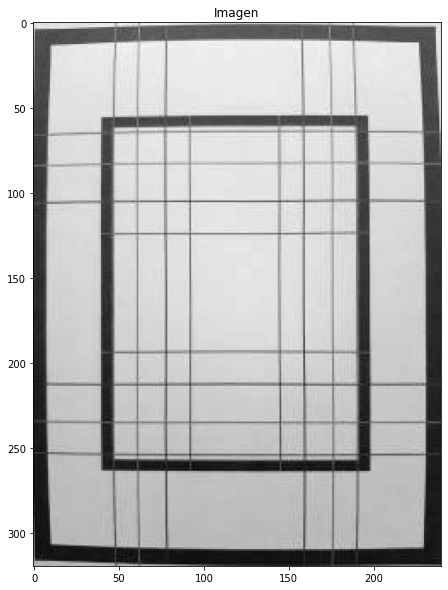

In [20]:
imagen= io.imread(path +r'\Prueba_1.jpeg',True)

plt.figure(figsize=(15,10))
plt.imshow(imagen,cmap='gray')
plt.title("Imagen")
plt.show()

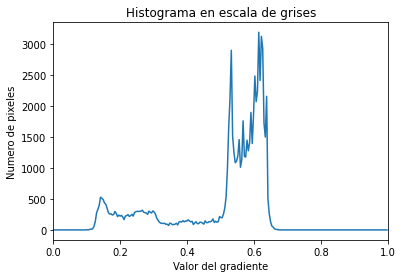

In [21]:
histogram, bin_edges = np.histogram(imagen, bins=256, range=(0, 1))
plt.title("Histograma en escala de grises")
plt.xlabel("Valor del gradiente")
plt.ylabel("Numero de pixeles")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)
plt.show()

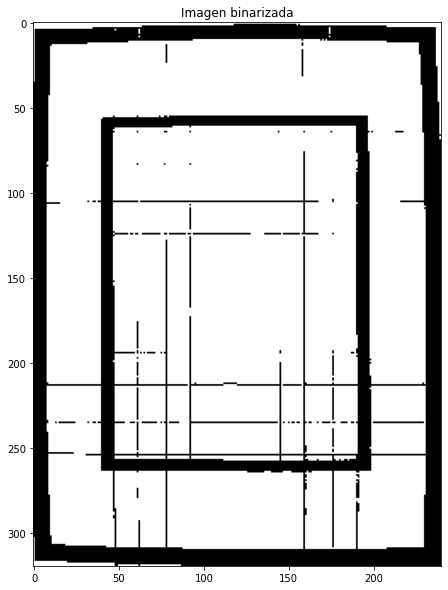

In [23]:
thresh = threshold_otsu(imagen)
binary = imagen > thresh
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(binary, cmap='gray')
plt.show()

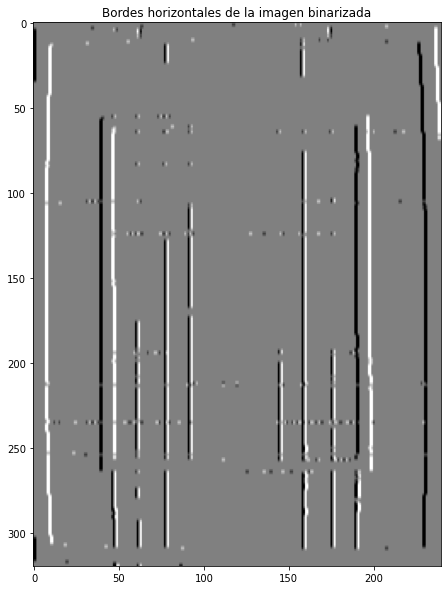

In [39]:
binary_v_borders = sobel_v(binary)
plt.figure(figsize=(15,10))
plt.title("Bordes horizontales de la imagen binarizada")
plt.imshow(binary_v_borders, cmap='gray')
plt.show()

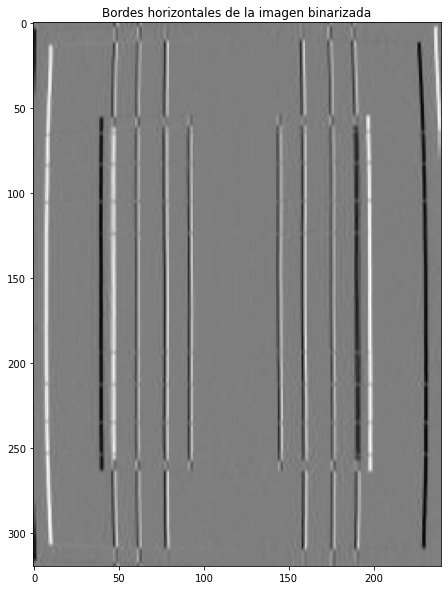

In [41]:
imagen_v_borders = sobel_v(imagen)
plt.figure(figsize=(15,10))
plt.title("Bordes horizontales de la imagen binarizada")
plt.imshow(imagen_v_borders, cmap='gray')
plt.show()

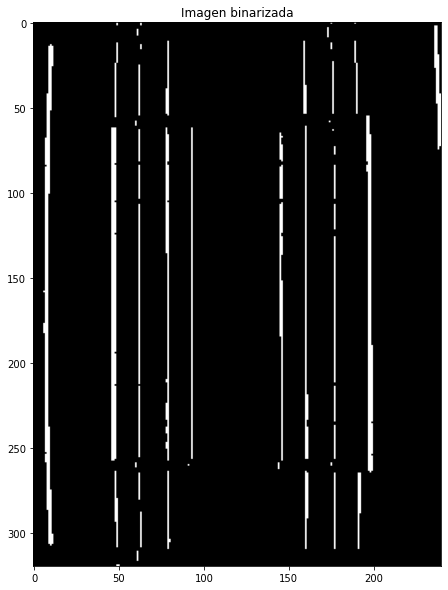

In [42]:
thresh = threshold_otsu(imagen_v_borders)
imagen_v_borders_binary = imagen_v_borders > thresh
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(imagen_v_borders_binary, cmap='gray')
plt.show()